### Doc 
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ML_loader import DatasetLoader,ModelLoader

In [51]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [52]:
#Model
model=ModelLoader()
model.set_model(MLPClassifier(max_iter=300,hidden_layer_sizes=(100,100,100),random_state=1))

#Optimization 122min Optimal params {'max_iter': 300, 'hidden_layer_sizes': (100, 100, 100)}

"""
param = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],
              'max_iter':[300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)


#Train model with optimal params
model.set_model(MLPClassifier())
"""


"\nparam = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],\n              'max_iter':[300,500,1000]}\ncv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)\n\nmodel.set_optimal_params(param)\n\nmodel.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)\n\n\n#Train model with optimal params\nmodel.set_model(MLPClassifier())\n"

Partial fit


Score accuracy group 0:  0.4192546583850932
Score accuracy group learned 0:  0.4192546583850932
Score accuracy global:  0.1383399209486166
Memory:  387.66015625 MB
Partial fit
Score accuracy group 1:  0.0
Score accuracy group learned 0:  0.6149068322981367
Score accuracy group learned 1:  0.0
Score accuracy global:  0.1808300395256917
Memory:  391.37109375 MB
Partial fit
Score accuracy group 2:  0.0
Score accuracy group learned 0:  0.5745341614906833
Score accuracy group learned 1:  0.7608695652173914
Score accuracy group learned 2:  0.0
Score accuracy global:  0.24209486166007904
Memory:  396.80078125 MB
Partial fit
Score accuracy group 3:  0.0
Score accuracy group learned 0:  0.32298136645962733
Score accuracy group learned 1:  0.6739130434782609
Score accuracy group learned 2:  0.0
Score accuracy group learned 3:  0.0
Score accuracy global:  0.16205533596837945
Memory:  402.5890625 MB
Partial fit
Score accuracy group 4:  0.0
Score accuracy group learned 0:  0.13354037267080746
Score

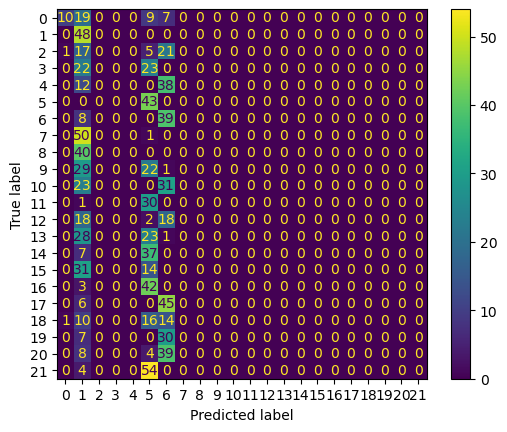

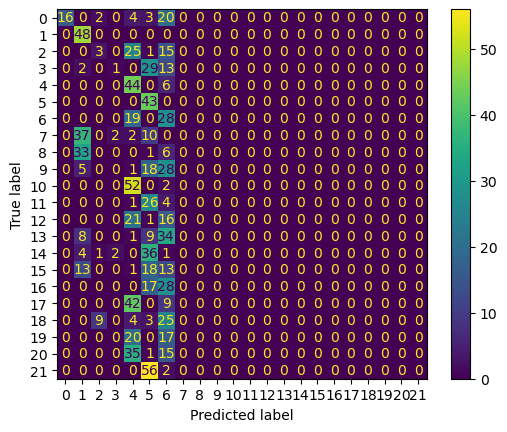

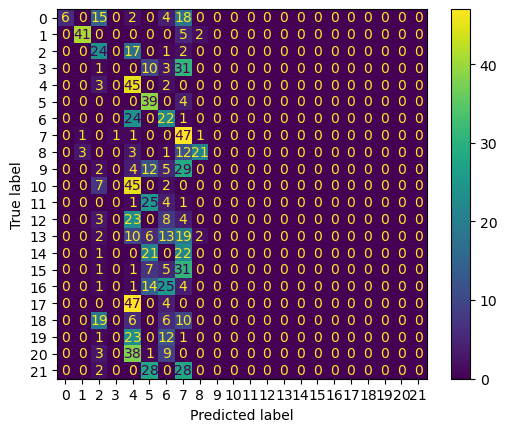

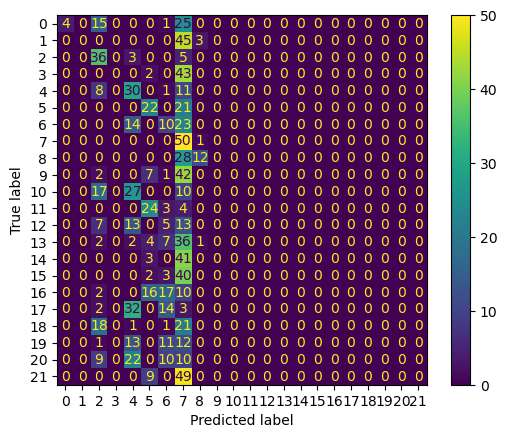

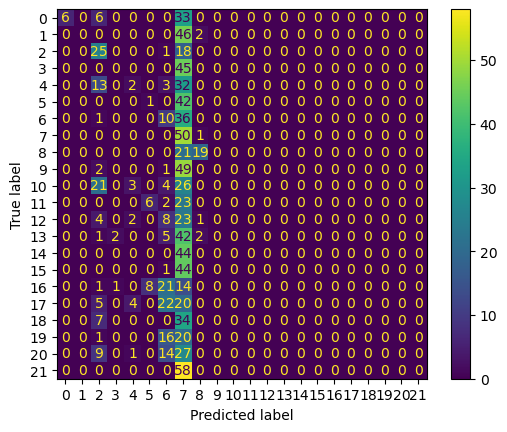

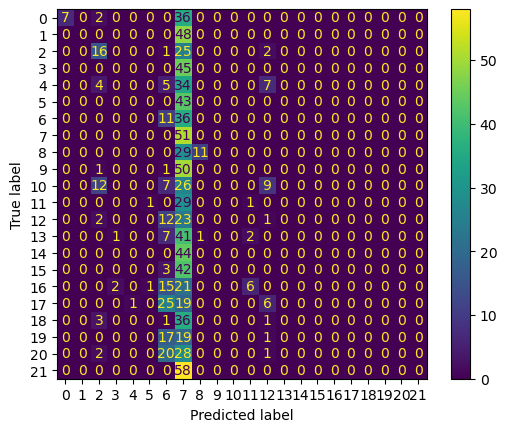

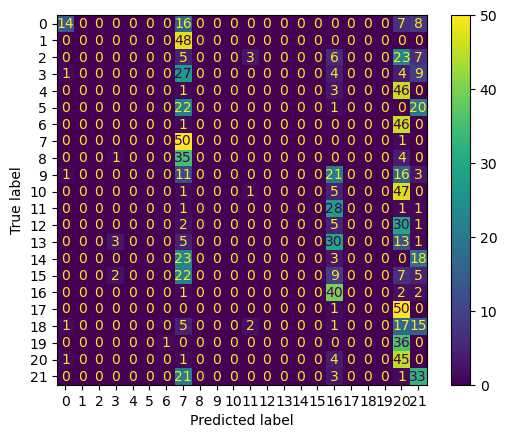

In [53]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group,random_state=1)
memory_values = []
accuracy_learned_grouped = []


#Train model
for idx,(X_train,y_train,X_test,y_test) in enumerate(zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    print(f"Score accuracy group {idx}: ",model.score(X_test,y_test))
    accuracy_learned = []
    for i in range(idx+1):
        print(f"Score accuracy group learned {i}: ",model.score(X_test_merged[i],y_test_merged[i]))
        accuracy_learned.append(model.score(X_test_merged[i],y_test_merged[i]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    accuracy_learned_grouped.append(accuracy_learned)
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

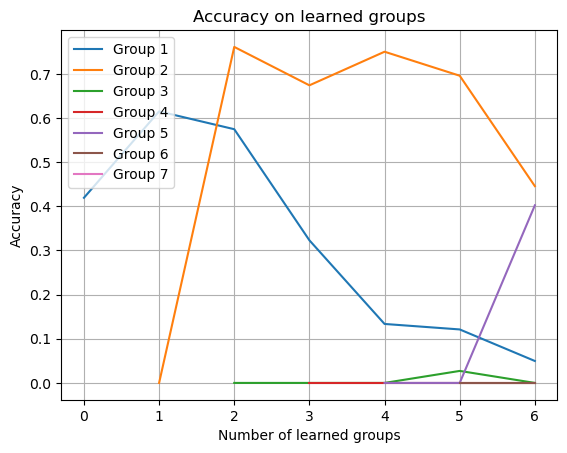

<Axes: title={'center': 'Accuracy on learned groups'}, xlabel='Number of learned groups', ylabel='Accuracy'>

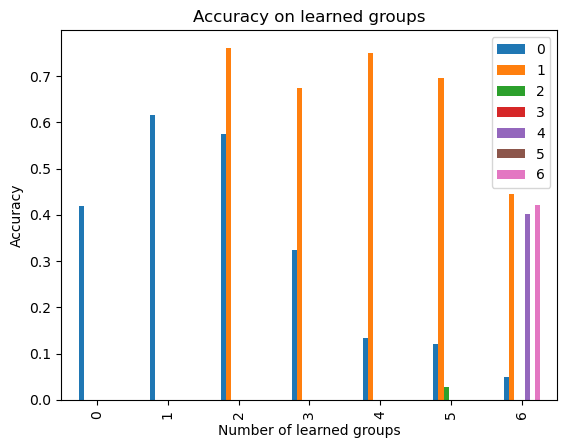

In [54]:
#Figure for accuracy on learned class
df = pd.DataFrame(accuracy_learned_grouped)
df1 = df.replace(np.nan, 0)
df=df.T

fig, ax = plt.subplots()
for i in range(len(class_to_group)):
    ax.plot(list(df.iloc[i]),label=f'Group {i+1}')

ax.set(xlabel='Number of learned groups', ylabel='Accuracy',
        title='Accuracy on learned groups')

ax.grid()
ax.legend()
plt.show()

# Bar plot 
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set(xlabel='Number of learned groups', ylabel='Accuracy',
        title='Accuracy on learned groups')

df1.plot(kind='bar', ax=ax)

Partial fit
Score accuracy batch 0:  0.21541501976284586
Score accuracy global:  0.22924901185770752
Memory:  413.4602864583333 MB
Partial fit
Score accuracy batch 1:  0.45849802371541504
Score accuracy global:  0.44565217391304346
Memory:  417.2036830357143 MB
Partial fit
Score accuracy batch 2:  0.5118577075098815
Score accuracy global:  0.49604743083003955
Memory:  418.4322916666667 MB
Partial fit
Score accuracy batch 3:  0.5434782608695652
Score accuracy global:  0.5395256916996047
Memory:  419.17578125 MB
Partial fit
Score accuracy batch 4:  0.5849802371541502
Score accuracy global:  0.5622529644268774
Memory:  421.046875 MB
Partial fit
Score accuracy batch 5:  0.6086956521739131
Score accuracy global:  0.5810276679841897
Memory:  421.79921875 MB
Partial fit
Score accuracy batch 6:  0.5988142292490118
Score accuracy global:  0.5958498023715415
Memory:  423.305859375 MB
Partial fit
Score accuracy batch 7:  0.6205533596837944
Score accuracy global:  0.6086956521739131
Memory:  408.5

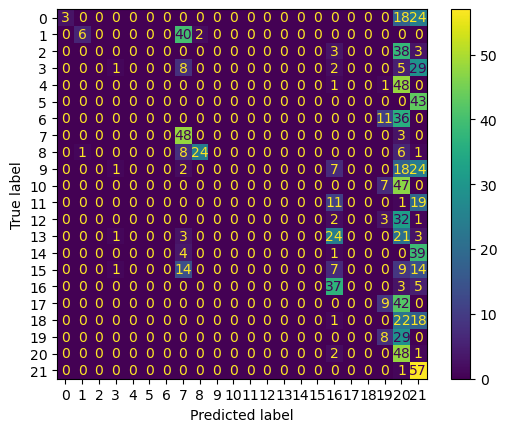

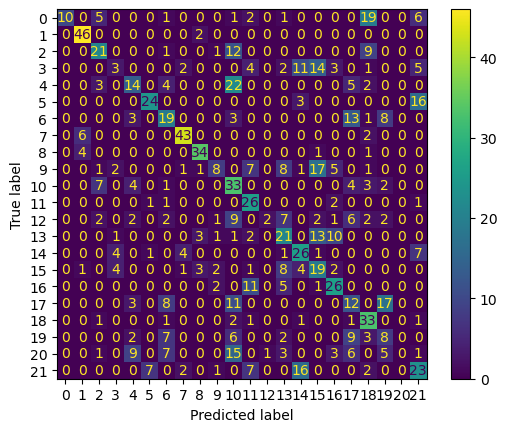

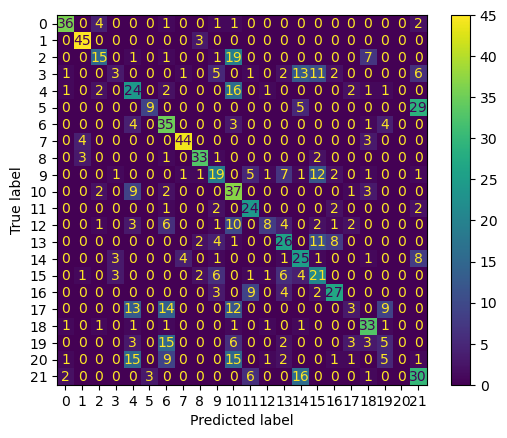

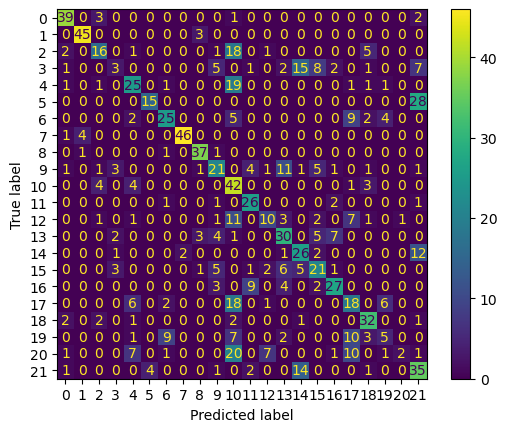

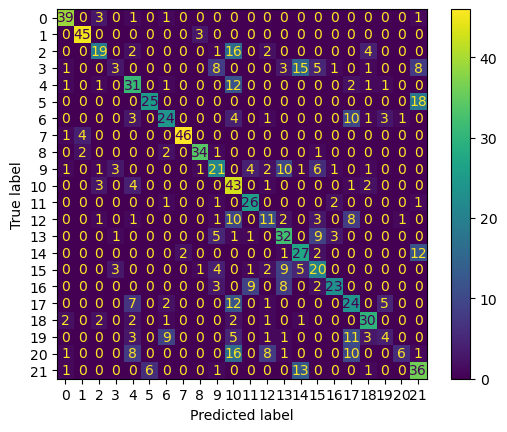

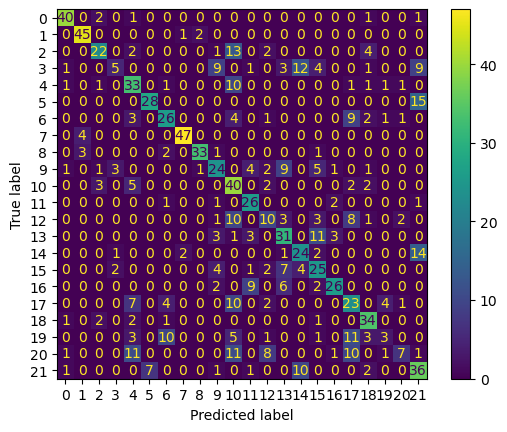

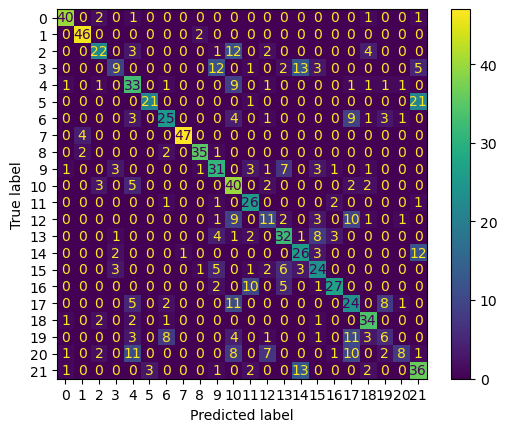

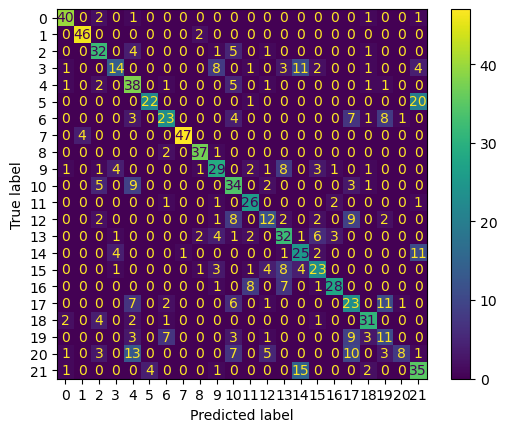

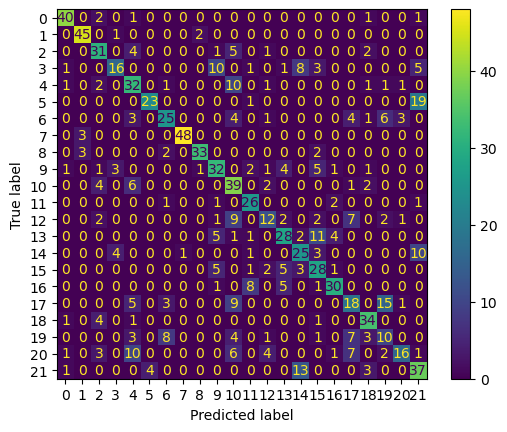

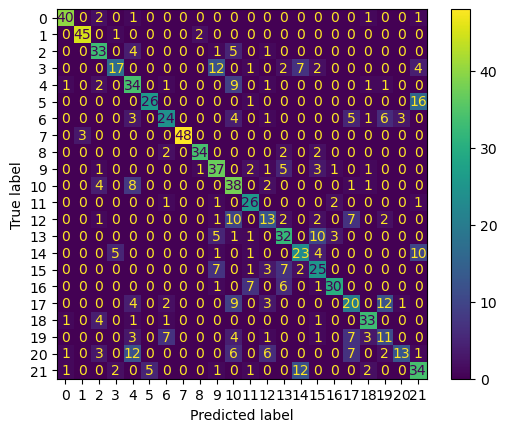

In [55]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10,random_state=1)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print(f"Score accuracy batch {x}: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")